<a href="https://colab.research.google.com/github/Sc2304Jose/Aplicacion/blob/main/Regression-Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.html.widgets import interact

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Text(4, 9, 'Y = 0.500 X + 3.000')

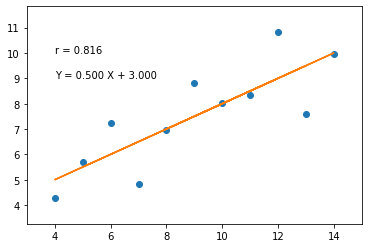

In [2]:
# X e Y serán el primer conjunto del cuarteto de Anscombe
# (https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
X = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
Y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
# Calculamos los coeficientes del ajuste (a X + b)
a, b = np.polyfit(X, Y, 1)
# Calculamos el coeficiente de correlación
r = np.corrcoef(X, Y)
# Dibujamos los datos para poder visualizarlos y ver si sería lógico
# considerar el ajuste usando un modelo lineal
plt.plot(X, Y, 'o')
plt.xlim(np.min(X) -1, np.max(X) +1)
plt.ylim(np.min(Y) -1, np.max(Y) +1)
plt.plot(X, a * X + b)
plt.text(4, 10, 'r = {0:2.3f}'.format(r[0,1]))
plt.text(4, 9, 'Y = {0:2.3f} X + {1:2.3f}'.format(a, b))

In [3]:
# Los datos de partida
X = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
Y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
# Primero calculamos la media de X e Y
xmean = X.mean()
ymean = Y.mean()
# Como b depende de a primero hemos de obtener a
ahat = np.sum((X - xmean) * (Y - ymean)) / np.sum((X - xmean)**2)
bhat = ymean - ahat * xmean
# Calculamos los valores usando numpy.polyfit
a, b = np.polyfit(X, Y, 1)
# Mostramos resultados
print('ajuste paso a paso, a, b = ', ahat, bhat)
print('ajuste con polyfit, a, b = ', a, b)
print(np.testing.assert_almost_equal(ahat, a, decimal = 7),
np.testing.assert_almost_equal(bhat, b, decimal = 7))

ajuste paso a paso, a, b =  0.5000909090909091 3.0000909090909103
ajuste con polyfit, a, b =  0.5000909090909094 3.000090909090908
None None


In [26]:
a = np.linspace(0.3,0.7,100)
b = np.linspace(0,6,100)
RSS = np.empty((len(a), len(b)))
for i, ai in enumerate(a):
  for j, bj in enumerate(b):
    RSS[i, j] = np.sum((Y - bj - ai * X)**2)
def plotea(ai, bi):
  xx, yy = np.meshgrid(b, a)
  levels = np.array([10,20,30,50,80,120,180,250,400,1000,2000])
  colors = 1 - levels / levels.max()
  plt.figure(figsize = (15,7))
  plt.subplot(121)
  plt.plot(X, Y, 'o')
  plt.plot([X.min(), X.max()],
  [X.min() * ai + bi, X.max() * ai + bi])
  plt.text(5, 12, 'RSS={:5.2f}'.format(np.sum((Y - bi - ai * X)**2)))
  plt.ylim(0,14)
  plt.subplot(122)
  plt.contourf(yy, xx, RSS, levels = levels, colors = colors.astype('str'))
  CS = plt.contour(yy, xx, RSS, levels = levels, colors = 'k')
  plt.clabel(CS, inline=1, fontsize=10)
  plt.scatter(ahat, bhat, color = 'y')
  plt.scatter(ai, bi, color = 'g', s = 200, marker = 's')
  plt.grid()
interact(plotea, ai = [0.30, 0.70], bi = [0.0, 6.0])

interactive(children=(Dropdown(description='ai', options=(0.3, 0.7), value=0.3), Dropdown(description='bi', op…

<function __main__.plotea>

In [ ]:

def genera_líneas(numero_lineas, numero_puntos):
    a = 5
    b = 1
    X = np.linspace(0, 100, numero_puntos)
    Y = np.empty((len(X), numero_lineas))
    for i in range(Y.shape[1]):
        eps = np.random.normal(scale = 100, size = numero_puntos)
        Y[:,i] = a * X + b + eps
        ahat, bhat = np.polyfit(X, Y[:,i], deg = 1)
        plt.plot(X, X * ahat + bhat, color = (0,0,0.9))
    plt.plot(X, X * a + b, 'k', lw = 10)
    ahat, bhat = np.polyfit(X, Y.mean(axis = 1), deg = 1)
    plt.plot(X, X * ahat + bhat, 'y', lw = 5)
    plt.text(20, 400, 'ahat = {:3.2f}'.format(ahat))
    plt.text(20, 375, 'bhat = {:3.2f}'.format(bhat))
    plt.xlim(0,100)
    plt.ylim(-50,550)
    widgets=0.0
    
interact(genera_líneas, 
         numero_lineas = widgets.FloatSliderWidget(min = 3, max = 100, step = 1, value = 3, description = "Número de líneas"),
         numero_puntos = widgets.FloatSliderWidget(min = 5, max = 100, step = 1, value = 5, description= "Puntos para cada línea"))

In [28]:
# 0.025 es 0.05 (5%) / 2 para tener en cuenta ambas colas
stats.t.isf(0.025, len(X)-2)

2.262157162740992

In [29]:
# Calculamos los parámetros del ajuste, a y b, ax+b
ahat, bhat = np.polyfit(X, Y, deg = 1)
# Calculamos los residuos
residuos = Y - (ahat * X + bhat)
# Calculamos la suma cuadrática de los residuos (RSS, residual sum of squares)
RSS = np.sum(residuos**2)
# Calculamos el error estándar de los residuos (RSE, residual standard error)
RSE = np.sqrt(RSS/(len(X)-2))
# Error estándar de la estimación de la pendiente
SEa = np.sqrt(RSE**2 / np.sum((X - X.mean())**2))
SEb = np.sqrt(RSE**2 * (1 / len(X) + X.mean()**2 / np.sum((X - X.mean())**2)))

print("Probabilidad del 95% de que a esté en el intervalo :", ahat - 2.262 * SEa, ahat + 2.262 * SEa)
print("Probabilidad del 95% de que b esté en el intervalo :", bhat - 2.262 * SEb, bhat + 2.262 * SEb)

Probabilidad del 95% de que a esté en el intervalo : 0.2333886667435851 0.7667931514382336
Probabilidad del 95% de que b esté en el intervalo : 0.45591366828175595 5.54426814990006


In [30]:
# X e Y serán el primer conjunto del cuarteto de Anscombe 
# (https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
X = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
Y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

# Calculamos los parámetros del ajuste, a y b, ax+b
ahat, bhat = np.polyfit(X, Y, deg = 1)
# Calculamos los residuos
residuos = Y - (ahat * X + bhat)
# Calculamos la suma cuadrática de los residuos (RSS, residual sum of squares)
RSS = np.sum(residuos**2)
# Calculamos el error estándar de los residuos (RSE, residual standard error)
RSE = np.sqrt(RSS/(len(X)-2))
# Error estándar de la estimación de la pendiente
SEa = np.sqrt(RSE**2 / np.sum((X - X.mean())**2))
# Calculamos el estadístico t
t = ahat / SEa
# Calculamos el p-valor
# Aquí estamos usando scipy.stats 
# donde metemos los grados de libertad (len(X) - 2) 
# y calculamos la CDF del valor t
# Como calculamos la CDF y solo obtenemos una de las 
# colas lo multiplicamos por dos para considerar ambos extremos
p = 2 * (1 - stats.t(len(X) - 2).cdf(t))

print('Valor de la pendiente estimada, a = ', ahat)
print('RSS = ', RSS)
print('RSE = ', RSE)
print('Error estándar = ', SEa)
print('Valor de t = ', t)
print('Valor de p = ', p)

Valor de la pendiente estimada, a =  0.5000909090909094
RSS =  13.76269
RSE =  1.236603322726321
Error estándar =  0.11790550059563407
Valor de t =  4.241455288892834
Valor de p =  0.0021696288730788105


In [31]:

# Calculamos ls suma total de los cuadrados
TSS = np.sum((Y - Y.mean())**2)
# Calculamos los residuos
residuos = Y - (ahat * X + bhat)
# Calculamos la suma cuadrática de los residuos (RSS, residual sum of squares)
RSS = np.sum(residuos**2)

R2 = 1 - RSS/TSS

print(R2)

0.666542459508775


In [32]:
r2 = np.corrcoef(X, Y)[0,1]**2
print(r2, R2)
print(np.testing.assert_almost_equal(r2, R2, decimal = 7))

0.6665424595087752 0.666542459508775
None


In [33]:
result = sm.OLS(Y, sm.add_constant(X)).fit()
print(result.summary().tables[1])
print('R^2 = ', result.rsquared)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0001      1.125      2.667      0.026       0.456       5.544
x1             0.5001      0.118      4.241      0.002       0.233       0.767
R^2 =  0.666542459508775


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


In [34]:
ans_x_I = np.array([10.0, 8.0, 13.0, 9.0, 11.0,
                    14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
ans_y_I = np.array([8.04, 6.95, 7.58, 8.81, 8.33,
                    9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
ans_x_II = np.array([10.0, 8.0, 13.0, 9.0, 11.0,
                     14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
ans_y_II = np.array([9.14, 8.14, 8.74, 8.77, 9.26,
                     8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
ans_x_III = np.array([10.0, 8.0, 13.0, 9.0, 11.0,
                      14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
ans_y_III = np.array([7.46, 6.77, 12.74, 7.11, 7.81,
                      8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
ans_x_IV = np.array([8.0, 8.0, 8.0, 8.0, 8.0,
                     8.0, 8.0, 19.0, 8.0, 8.0, 8.0])
ans_y_IV = np.array([6.58, 5.76, 7.71, 8.84, 8.47,
                     7.04, 5.25, 12.50, 5.56, 7.91, 6.89])
x = [ans_x_I, ans_x_II, ans_x_III, ans_x_IV]
y = [ans_y_I, ans_y_II, ans_y_III, ans_y_IV]

In [35]:
for X, Y in zip(x, y):
    result = sm.OLS(Y, sm.add_constant(X)).fit()
    print(result.summary().tables[1])
    print(result.rsquared)
    print('\n'*3)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0001      1.125      2.667      0.026       0.456       5.544
x1             0.5001      0.118      4.241      0.002       0.233       0.767
0.666542459508775




                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0009      1.125      2.667      0.026       0.455       5.547
x1             0.5000      0.118      4.239      0.002       0.233       0.767
0.6662420337274844




                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0025      1.124      2.670      0.026       0.459       5.546
x1             0.4997      0.118      4.239      0.002       0.233       0.766
0.66632

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Sat, 07 Aug 2021   Prob (F-statistic):            0.00217
Time:                        16:23:43   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0001      1.125      2.667      0.0

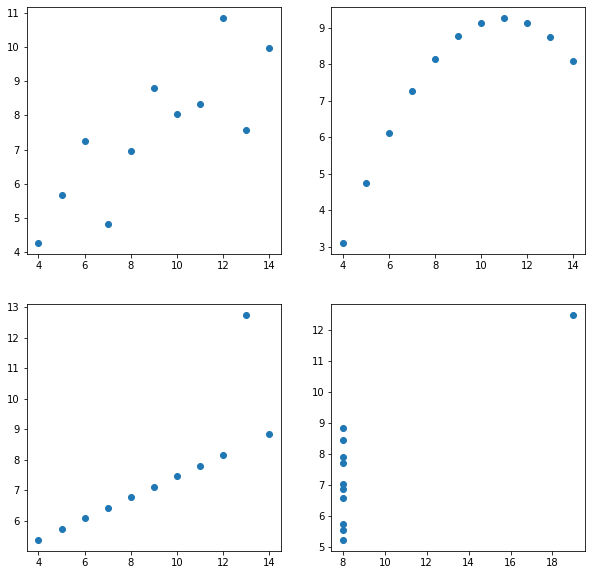

In [36]:
plt.figure(figsize = (10,10))
i = 1
for X, Y in zip(x, y):
    result = sm.OLS(Y, sm.add_constant(X)).fit()
    print(result.summary())
    plt.subplot(2, 2, i)
    plt.plot(X, Y, 'o')
    i += 1